In [1]:
%matplotlib inline
import pysd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
model = pysd.read_vensim('C:/repos/Defence-Autonomy/model_wip.mdl')
# model.doc

# Control variables

In [3]:
stress_to_willingness_values = np.arange(1,3.1,0.5)

delay_in_delivery_values = np.arange(1, 22, 4)

geopolitical_shock_values = np.arange(0.0, 0.5, 0.1)

In [4]:
def run_results(params_dict):
    res = model.run(params_dict,
                return_columns=['Constrained Defence Spending', 
                                'Cumulative Defence Spending', 
                                'rate of orders fulfilled',
                                'rate of expenses',
                                'Cumulative Earnings'])
    
    return res

In [5]:
# # Columns needed 
# columns = [
#     'Constrained Defence Spending',
#     'Cumulative Defence Spending',
#     'rate of orders fulfilled',
#     'Cumulative Earnings',
#     'stress_to_willingness'
# ]

# Stress to willingness to spend only impacts
- Defence Spending 
- Cumulative Earnings

In [6]:
control_dict = {}
results_list =[]

# loop over all possible stress values
for stress in stress_to_willingness_values:
    # each iteration gets a different stress value
    control_dict['stress to willingness'] = stress
    output_df = run_results(params_dict=control_dict) 
    output_df['stress_to_willingness'] = stress
    results_list.append(output_df)

willingness_to_spend_results_df = pd.concat(results_list)

In [7]:
willingness_to_spend_results_df.reset_index(inplace=True)

Shows how sensitive willingness to Defence Spending

Text(0, 0.5, 'Cumulative Earnings (Billion €)')

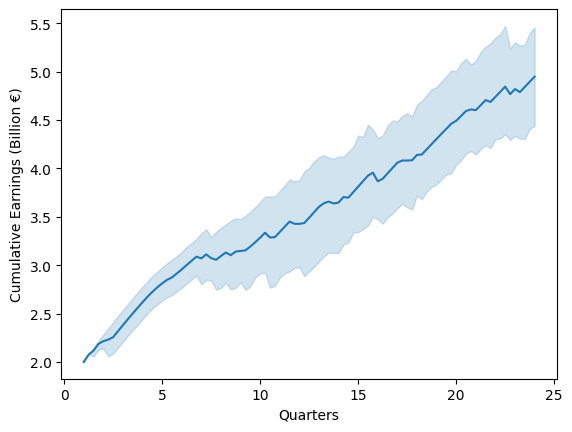

In [8]:
sns.lineplot(data=willingness_to_spend_results_df,
             x='time',
             y='Cumulative Earnings',
             )
plt.xlabel('Quarters')
plt.ylabel('Cumulative Earnings (Billion €)')

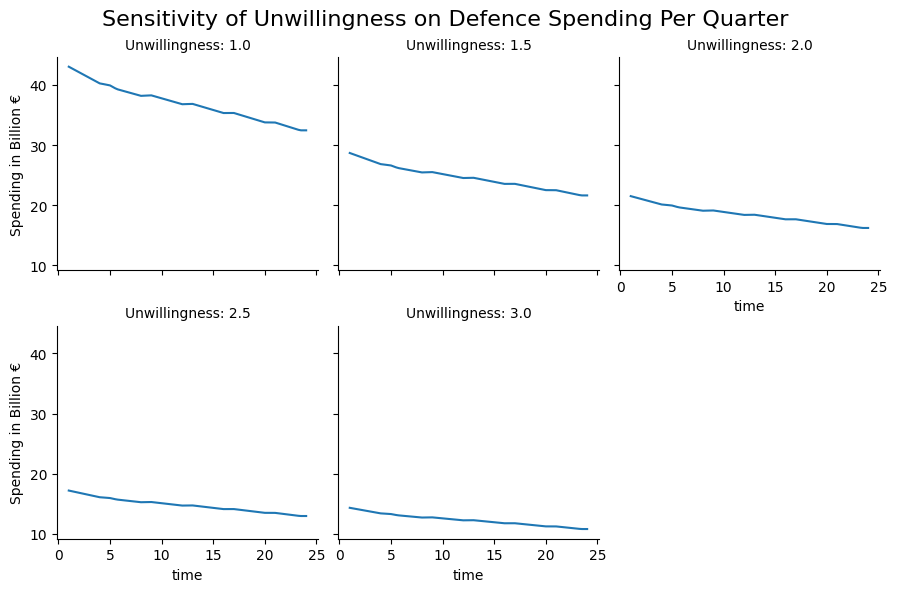

In [9]:
g = sns.FacetGrid(willingness_to_spend_results_df,
                  col='stress_to_willingness', 
                  col_wrap=3, sharey=True)
g.map(sns.lineplot, 'time', 'Constrained Defence Spending')
g.set_titles("Unwillingness: {col_name}")
g.set_ylabels('Spending in Billion €')

# Add overall title
g.fig.suptitle("Sensitivity of Unwillingness on Defence Spending Per Quarter", 
               fontsize=16)

# Adjust spacing to make room for the title
g.fig.subplots_adjust(top=0.9)  # Move the plots down to make space for the title

plt.show()


# Delay in Delivery
- Cumulative Earnings

In [10]:
control_dict = {}
results_list =[]

# loop over all possible stress values
for shock in delay_in_delivery_values:
    # each iteration gets a different delay value
    control_dict['delay in delivery'] = delay
    output_df = run_results(params_dict=control_dict) 
    output_df['delay_in_delivery'] = delay
    results_list.append(output_df)

delay_results = pd.concat(results_list)
delay_results.reset_index(inplace=True)

NameError: name 'delay' is not defined

C:\Users\Keshav\AppData\Local\Temp\ipykernel_9968\4049947275.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=delay_results, x='time', y='Cumulative Earnings',


Text(0, 0.5, 'Cumulative Earnings (Billion €)')

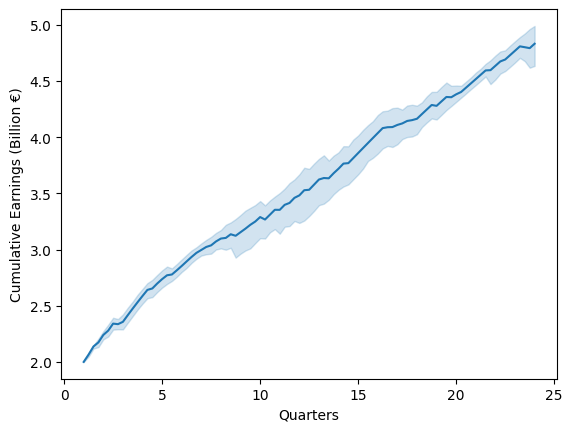

In [ ]:
sns.lineplot(data=delay_results, x='time', y='Cumulative Earnings', 
             palette='tab10')
plt.xlabel('Quarters')
plt.ylabel('Cumulative Earnings (Billion €)')

# Geopolitical Shock

In [ ]:
control_var = {}
results_list =[]

for shock in geopolitical_shock_values:
    control_var['geopolitical shock probability'] = shock
    output_df = run_results(params_dict=control_var) 
    output_df['geopolitical_shock_values'] = shock
    results_list.append(output_df)

geo_results_df = pd.concat(results_list)
geo_results_df.reset_index(inplace=True)

Text(0, 0.5, 'Cumulative Earnings (Billion €)')

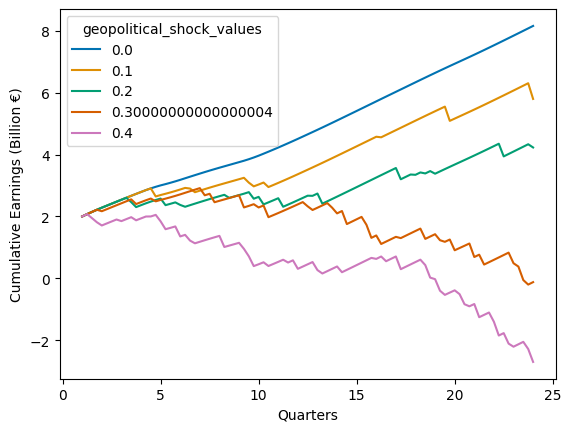

In [ ]:
sns.lineplot(data=geo_results_df, 
             x='time', 
             y='Cumulative Earnings', hue="geopolitical_shock_values",
             palette='colorblind')
plt.xlabel('Quarters')
plt.ylabel('Cumulative Earnings (Billion €)')

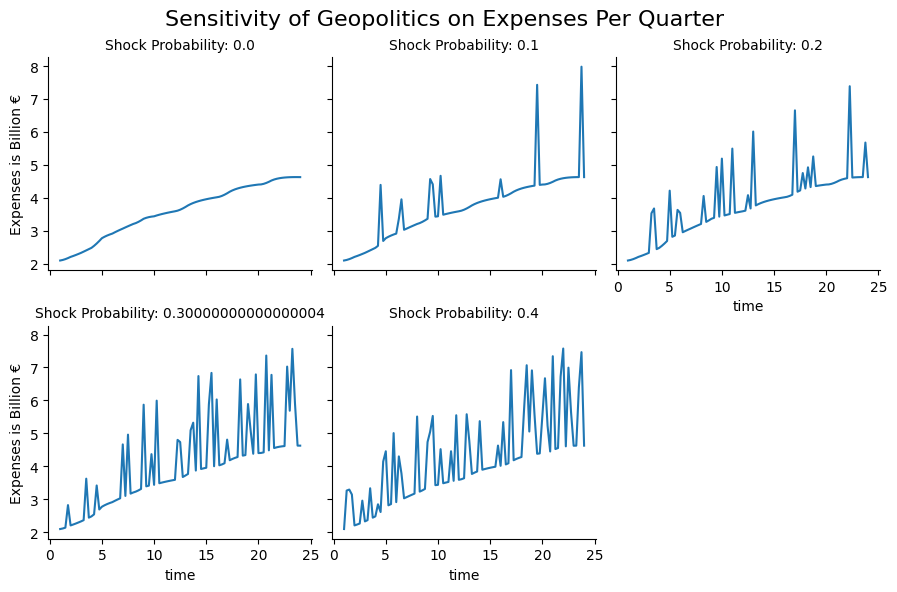

In [ ]:
g = sns.FacetGrid(geo_results_df,
                  col='geopolitical_shock_values', 
                  col_wrap=3, sharey=True)
# g.map(sns.lineplot, 'time', 'rate of expenses')
g.map(sns.lineplot, 'time', 'rate of expenses')
g.set_titles("Shock Probability: {col_name}")
g.set_ylabels('Expenses is Billion €')

# Add overall title
g.fig.suptitle("Sensitivity of Geopolitics on Expenses Per Quarter", 
               fontsize=16)

# Adjust spacing to make room for the title
g.fig.subplots_adjust(top=0.9)  # Move the plots down to make space for the title

plt.show()


# Simulate all together

In [21]:
stress_to_willingness_values = np.arange(1,3.1,0.5)
stress_to_willingness_values

delay_in_delivery_values = np.arange(1, 22, 5)
delay_in_delivery_values

geopolitical_shock_values = np.arange(0.0, 0.5, 0.1)

In [ ]:
# Simiulation
from itertools import product

all_results_list = []

for stress, delay, shock in product(stress_to_willingness_values, 
                                    delay_in_delivery_values, 
                                    geopolitical_shock_values):
    control_var = {
        'stress to willingness': stress,
        'delay in delivery': delay,
        'geopolitical shock probability': shock
    }
    
    output_df = run_results(params_dict=control_var) 
    
    output_df['stress_to_willingness'] = stress
    output_df['delay'] = delay
    output_df['shock'] = shock
    
    all_results_list.append(output_df)



In [ ]:
# For plotting
all_results_df['shock_pct'] = (all_results_df['shock'] * 100).astype(int).astype(str) + '%'

In [65]:
all_results_df.columns

Index(['index', 'Constrained Defence Spending', 'Cumulative Defence Spending',
       'rate of orders fulfilled', 'rate of expenses', 'Cumulative Earnings',
       'stress_to_willingness', 'delay', 'shock', 'shock_pct'],
      dtype='object')

In [ ]:
sns.lineplot(all_results_df, x='time', y='Cumulative Earnings')

ValueError: Could not interpret value `time` for `x`. An entry with this name does not appear in `data`.

In [60]:
sns.boxplot(x='stress_to_willingness', 
            y='Cumulative Earnings', 
            hue='shock_pct', 
            data=all_results_df,
            palette='colorblind')
plt.xlabel("Unwillingness to Spend on Defence")
plt.ylabel("Cumulative Earnings (Billion €)")
plt.legend(title="Geopolitical Shock")


ValueError: Could not interpret value `shock_pct` for `hue`. An entry with this name does not appear in `data`.

In [58]:
print(all_results_df.groupby(['stress_to_willingness', 'delay']).size().unstack(fill_value=0))

delay                   1    6    11   16   21
stress_to_willingness                         
1.0                    465  465  465  465  465
1.5                    465  465  465  465  465
2.0                    465  465  465  465  465
2.5                    465  465  465  465  465
3.0                    465  465  465  465  465
